In [1]:
import pandas as pd
import numpy as np

#Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Libraries for model building
from sklearn.linear_model import LogisticRegression

#Libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#To handle any visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Hospital_Readmission.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [3]:
df.head()

,Age,Gender,Medical History,Recommended Health Tips,Smoking Status,Family History,Activity Level,Medical Checkup Frequency,Number of Previous Admissions,Days Since Last Discharge,Primary Diagnosis,Readmitted within 30 Days
0,37,Other,['Heart Disease'],"Keto: Low carb, Exercise: 45 mins/day",Never Smoked,Family History of Heart Disease,Active,Twice a year,2,196,Infection,0
1,89,Male,['Heart Disease'],"Paleo: High protein, Exercise: 60 mins/day",Former Smoker,Family History of Heart Disease,Moderately Active,Quarterly,4,218,Infection,0
2,19,Other,['Diabetes'],"Paleo: High protein, Exercise: 60 mins/day",Former Smoker,Family History of Hypertension,Sedentary,Twice a year,3,219,Surgery,1
3,84,Other,['Hypertension'],"DASH: Low salt, Exercise: 30 mins/day",Current Smoker,Family History of Diabetes,Sedentary,Twice a year,0,247,Accident,0
4,55,Female,"['Obesity', 'None', 'Hypertension']","Low-fat: Low calorie, Exercise: 45 mins/day",Current Smoker,Family History of Hypertension,Moderately Active,Once a year,7,343,Accident,0


# **Data Exploration**

In [4]:
#Check the shape of the dataset
dataset_shape = df.shape

#Check for missing values in each column
missing_values = df.isnull().sum()

#Summary statistics for numerical columns
summary_statistics = df.describe()

#Check the data types of each column
data_types = df.dtypes

In [5]:
dataset_shape

(1000, 12)

In [6]:
missing_values

Age                              0
Gender                           0
Medical History                  0
Recommended Health Tips          0
Smoking Status                   0
Family History                   0
Activity Level                   0
Medical Checkup Frequency        0
Number of Previous Admissions    0
Days Since Last Discharge        0
Primary Diagnosis                0
Readmitted within 30 Days        0
dtype: int64

In [7]:
summary_statistics

,Age,Number of Previous Admissions,Days Since Last Discharge,Readmitted within 30 Days
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.712000,4.556000,182.938000,0.302000
std,20.355574,2.906426,105.497032,0.459355
min,18.000000,0.000000,0.000000,0.000000
25%,35.000000,2.000000,91.750000,0.000000
50%,53.000000,5.000000,187.000000,0.000000
75%,69.250000,7.000000,273.000000,1.000000
max,89.000000,9.000000,364.000000,1.000000


In [8]:
data_types

Age                               int64
Gender                           object
Medical History                  object
Recommended Health Tips          object
Smoking Status                   object
Family History                   object
Activity Level                   object
Medical Checkup Frequency        object
Number of Previous Admissions     int64
Days Since Last Discharge         int64
Primary Diagnosis                object
Readmitted within 30 Days         int64
dtype: object

In [9]:
#Distribution of the target variable (Readmitted within 30 Days)
target_distribution = df['Readmitted within 30 Days'].value_counts()

In [10]:
target_distribution

Readmitted within 30 Days
0    698
1    302
Name: count, dtype: int64

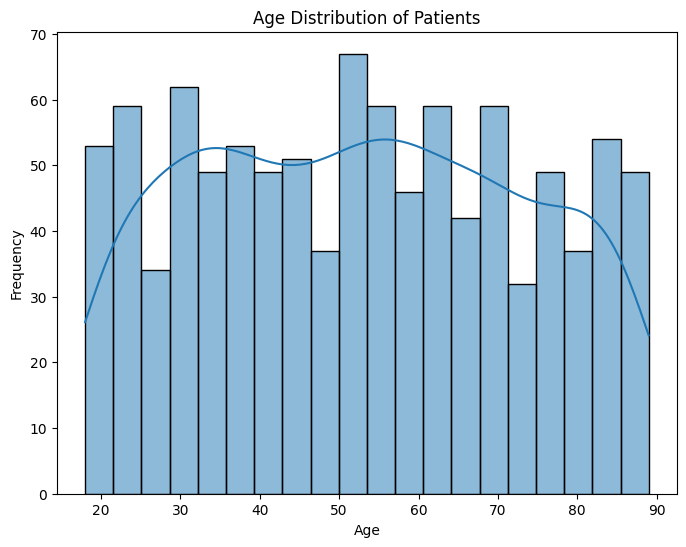

In [11]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**What the histogram shows:**

1. Bins: The x-axis represents different age intervals (bins), and the y-axis represents the frequency (number of patients) in each bin.
2. KDE (Kernel Density Estimate): If included, the smooth curve over the histogram represents the estimated probability density function of the age distribution, helping visualize the overall shape of the distribution.

**What to interpret:**
The histogram will show whether the age distribution is uniform, skewed, or normal:
- Normal distribution: A bell-shaped curve centered around a mean value.
- Right-skewed (positive skew): More patients are younger, with fewer older patients.
- Left-skewed (negative skew): More patients are older, with fewer younger patients.

We can observe which age groups are more common in the dataset, such as whether the majority of patients fall within a particular age range (e.g., 40-60 years old) or whether the dataset has a good spread across different age groups.

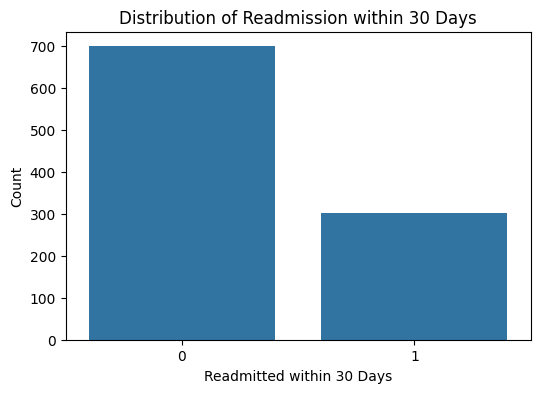

In [12]:
# Readmission Rate
plt.figure(figsize=(6, 4))
sns.countplot(x='Readmitted within 30 Days', data=df)
plt.title('Distribution of Readmission within 30 Days')
plt.xlabel('Readmitted within 30 Days')
plt.ylabel('Count')
plt.show()

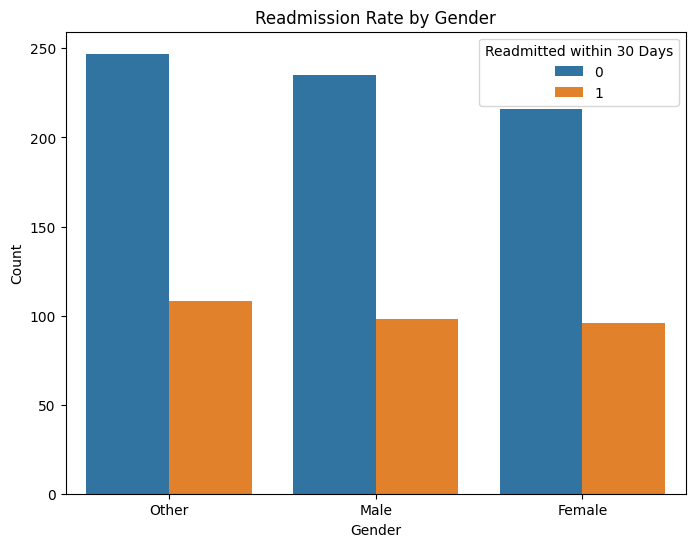

In [13]:
# Gender vs Readmission Rate
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Readmitted within 30 Days', data=df)
plt.title('Readmission Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

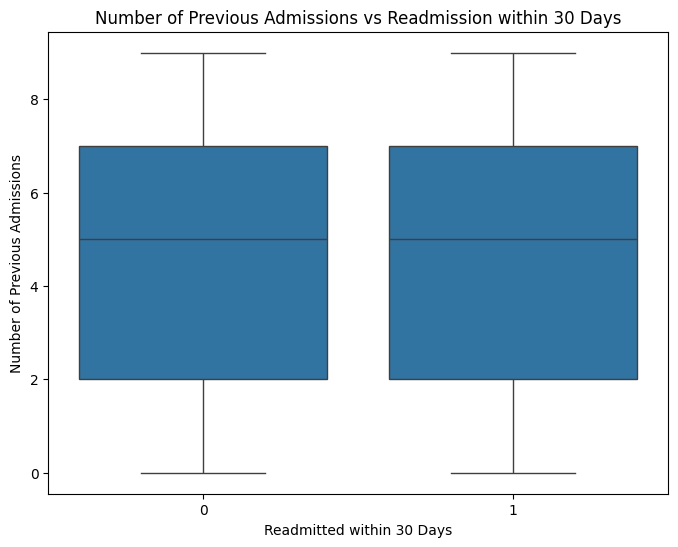

In [14]:
# Number of Previous Admissions vs Readmission
plt.figure(figsize=(8, 6))
sns.boxplot(x='Readmitted within 30 Days', y='Number of Previous Admissions', data=df)
plt.title('Number of Previous Admissions vs Readmission within 30 Days')
plt.xlabel('Readmitted within 30 Days')
plt.ylabel('Number of Previous Admissions')
plt.show()

**What the box plot shows:**

1. The box: Represents the interquartile range (IQR), which contains the middle 50% of the data.
2. The line inside the box: This is the median (50th percentile) of the data for each category.
3. The "whiskers": These extend to the smallest and largest values within 1.5 times the IQR.
4. Outliers: Data points outside the whiskers are considered outliers and are plotted as individual points.

**What to interpret:**
1. If the box plot shows higher median values for the "Yes" category (patients readmitted within 30 days) compared to the "No" category, this would suggest that patients with more previous admissions are more likely to be readmitted.
2. The spread and any potential outliers can give insights into the variability of previous admissions for each category. If there are outliers, it indicates some patients have an unusually high number of previous admissions, which might be a significant factor in readmission likelihood.

# **Data Preprocessing**

**Encoding categorical variables**

We have several categorical variables that need to be converted into a format the machine learning algorithm can understand (i.e., numerical format). We’ll use two main encoding techniques:

- Label Encoding: For binary categories (e.g., "Gender" where values are Male/Female/Other).
- One-Hot Encoding: For multi-class categories (e.g., "Family History" which can have several different types of values).

In [15]:
# Label Encoding for binary categorical variables
label_cols = ['Gender', 'Smoking Status', 
              'Medical Checkup Frequency', 'Primary Diagnosis']

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [16]:
# One-Hot Encoding for multi-class categorical variables
df = pd.get_dummies(df, columns=['Family History', 'Activity Level', 'Recommended Health Tips'], drop_first=True)

**Why does the number of columns increase?**

1. **One-Hot Encoding:**

- What it does: One-hot encoding transforms categorical variables with multiple categories into multiple binary columns, one for each unique category.
- How it works: For each unique value in the categorical variable, a new column is created, where a 1 indicates the presence of that category, and a 0 indicates its absence.

For example: If we have a column called Family History with categories like:

- Family History of Heart Disease
- Family History of Diabetes
- Family History of Hypertension
- No Family History

After one-hot encoding, this single column would be transformed into multiple binary columns:

- Family History_Family History of Heart Disease
- Family History_Family History of Diabetes
- Family History_Family History of Hypertension
Each of these columns will have 0 or 1 to indicate whether a patient has that particular family history.

2. **Label Encoding:**
   
- This encoding does not increase the number of columns because the original column is replaced with the encoded values.

**Handeling the 'Medical History' Column**

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

In [18]:
# 1. Convert 'Medical History' lists into a one-hot encoded DataFrame
mlb = MultiLabelBinarizer()
medical_history_encoded = pd.DataFrame(mlb.fit_transform(df['Medical History'].apply(eval)), columns=mlb.classes_)

# 2. Drop the original 'Medical History' column from the DataFrame
df = df.drop('Medical History', axis=1)

In [19]:
#Concatenate the new one-hot encoded columns to the DataFrame
df = pd.concat([df, medical_history_encoded], axis=1)

In [20]:
# Display the dataset after encoding
df.head()

,Age,Gender,Smoking Status,Medical Checkup Frequency,Number of Previous Admissions,Days Since Last Discharge,Primary Diagnosis,Readmitted within 30 Days,Family History_Family History of Heart Disease,Family History_Family History of Hypertension,...,"Recommended Health Tips_Mediterranean: Balanced, Sleep: 7-8 hours/night","Recommended Health Tips_Paleo: High protein, Exercise: 60 mins/day","Recommended Health Tips_Vegan: High fiber, Sleep: 6-7 hours/night","Recommended Health Tips_Vegetarian: High protein, Exercise: 30 mins/day",Asthma,Diabetes,Heart Disease,Hypertension,None,Obesity
0,37,2,2,4,2,196,2,0,True,False,...,False,False,False,False,0,0,1,0,0,0
1,89,1,1,2,4,218,2,0,True,False,...,False,True,False,False,0,0,1,0,0,0
2,19,2,1,4,3,219,4,1,False,True,...,False,True,False,False,0,1,0,0,0,0
3,84,2,0,4,0,247,0,0,False,False,...,False,False,False,False,0,0,0,1,0,0
4,55,0,0,1,7,343,0,0,False,True,...,False,False,False,False,0,0,0,1,1,1


**__________________________________________________________________________**

**Scaling Numerical Features**

Machine learning models, like Logistic Regression, perform better when numerical features are on the same scale. We will standardize (scale) the following numerical features:

- Age
- Number of Previous Admissions
- Days Since Last Discharge

**StandardScaler:** It standardizes features by subtracting the mean and scaling to unit variance, which helps the model interpret the magnitude of numerical values.

In [21]:
scaler = StandardScaler()

#Scale Age, Number of Previous Admissions, Days Since Last Discharge
df[['Age', 'Number of Previous Admissions', 'Days Since Last Discharge']] = scaler.fit_transform(df[['Age', 'Number of Previous Admissions', 'Days Since Last Discharge']])

In [22]:
#Display the dataset after scaling
df.head()

,Age,Gender,Smoking Status,Medical Checkup Frequency,Number of Previous Admissions,Days Since Last Discharge,Primary Diagnosis,Readmitted within 30 Days,Family History_Family History of Heart Disease,Family History_Family History of Hypertension,...,"Recommended Health Tips_Mediterranean: Balanced, Sleep: 7-8 hours/night","Recommended Health Tips_Paleo: High protein, Exercise: 60 mins/day","Recommended Health Tips_Vegan: High fiber, Sleep: 6-7 hours/night","Recommended Health Tips_Vegetarian: High protein, Exercise: 30 mins/day",Asthma,Diabetes,Heart Disease,Hypertension,None,Obesity
0,-0.772263,2,2,4,-0.879871,0.123876,2,0,True,False,...,False,False,False,False,0,0,1,0,0,0
1,1.783598,1,1,2,-0.191396,0.332517,2,0,True,False,...,False,True,False,False,0,0,1,0,0,0
2,-1.656984,2,1,4,-0.535633,0.342001,4,1,False,True,...,False,True,False,False,0,1,0,0,0,0
3,1.537842,2,0,4,-1.568345,0.607544,0,0,False,False,...,False,False,False,False,0,0,0,1,0,0
4,0.112458,0,0,1,0.841316,1.517977,0,0,False,True,...,False,False,False,False,0,0,0,1,1,1


The negative values you're seeing are the result of standardization using the StandardScaler.

**Why are there negative numbers?**
When you use StandardScaler, it standardizes the numerical features by subtracting the mean and dividing by the standard deviation, transforming them to have:

- Mean = 0
- Standard Deviation = 1

**Values that are below the mean of the original feature will become negative, values that are above the mean will be positive, and values exactly at the mean will be zero.**

Example:

- If the mean of the "Age" column is 50, and someone is 40 years old, standardization will give them a negative value because they are younger (below the mean).
- Similarly, if someone has a high number of previous admissions, say 8, but the mean is 4, the standardized value will be positive.

**-----------------------------------------------------------------------**
**_______________________________________________________________________**

# **Model Building**

We’ll split the data into training and testing sets, and then build a **Logistic Regression model**.

In [23]:
#Define the target variable (y) and features (X)
X = df.drop('Readmitted within 30 Days', axis=1)  # Features
y = df['Readmitted within 30 Days']  # Target variable

- X contains all the features except the target variable
- y contains the target variable (whether a patient was readmitted within 30 days)

In [24]:
#Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
#Initialize the Logistic Regression model

# max_iter=1000 is set to ensure the model converges if it takes more iterations
# logreg = LogisticRegression(max_iter=1000)
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

In [26]:
#Train the Logistic Regression model on the training data

# The model learns from the training data (X_train and y_train)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [27]:
#Make predictions on the test set

y_pred = logreg.predict(X_test)

# **Model Evaluation**

We will evaluate the performance of the Logistic Regression model using the following metrics:

1. Accuracy: The percentage of correct predictions.'
2. Precision: The proportion of positive predictions that are actually correct.
3. Recall: The proportion of actual positives that were identified correctly.
4. F1-Score: The harmonic mean of Precision and Recall.
5. Confusion Matrix: A matrix showing True Positives, False Positives, True Negatives, and False Negatives.

In [28]:
#Calculate evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [29]:
#Print evaluation metrics

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.47
Precision: 0.25
Recall: 0.43
F1-Score: 0.32


**Interpretation:**

- **Accuracy:** The model correctly predicts the outcome for about 47% of cases. This is relatively low, but class imbalance plays a role here.
- **Precision (25%):** Out of all patients predicted as "readmitted," only 25% were correctly classified.
- **Recall (43%):** The model was able to identify 43% of actual readmissions, which is an improvement over the unbalanced version.
- **F1-Score (32%):** This score balances precision and recall, indicating the overall performance of the model in terms of correctly identifying readmitted patients.

**Confusion Matrix**

In [30]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

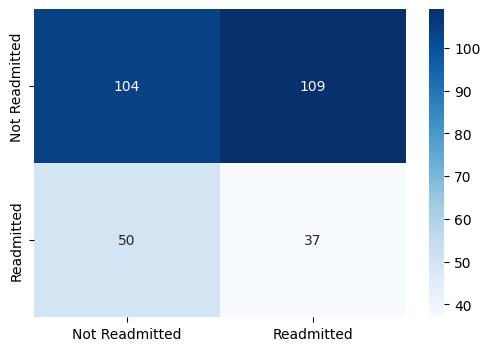

In [31]:
#Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Readmitted', 'Readmitted'], 
            yticklabels=['Not Readmitted', 'Readmitted'])

- **True Negatives (TN):** Patients correctly predicted as "Not Readmitted."
- **False Positives (FP):** Patients incorrectly predicted as "Readmitted" (predicted readmission but were not readmitted).
- **False Negatives (FN):** Patients incorrectly predicted as "Not Readmitted" (predicted no readmission but were actually readmitted).
- **True Positives (TP):** Patients correctly predicted as "Readmitted."

**Interpretation:**
1. The model has correctly predicted some cases of "Readmitted" and "Not Readmitted," but it also has a number of false positives and false negatives.
2. False Negatives are particularly important in this task, as these are patients who were actually readmitted but were not predicted to be.

**Suggestion:** We can focus on improving recall.

# **-------------------------------------------------------**

**1. Why We Chose Logistic Regression:**

We chose Logistic Regression for this task of predicting hospital readmission because it is a widely used and effective model for binary classification problems, where the goal is to classify an outcome into one of two categories (in this case, readmitted or not readmitted).

**2. How Logistic Regression Performs on This Task:**

Logistic Regression performs adequately for this task, especially after adjustments like class weighting.

- Baseline Performance: Initially, the model had low recall and precision, particularly struggling to identify the minority class (readmitted patients) due to class imbalance.
- Class Weighting: By applying class_weight='balanced', the model improved in recall, meaning it could identify more patients who were actually readmitted. This is important for reducing the number of False Negatives (missed readmissions).

# **Theoretical Task**

**Extract Coefficients and Intercept:**

In [32]:
#Extract the learned coefficients and intercept from the trained model
coefficients = logreg.coef_[0]  # Coefficients for the features
intercept = logreg.intercept_[0]  # Intercept (bias term)

In [33]:
#Display the coefficients and intercept
print(f'Intercept (beta_0): {intercept}')
for i, coef in enumerate(coefficients):
    print(f'Coefficient for feature {i+1}: {coef}')

Intercept (beta_0): 0.37674936676410276
Coefficient for feature 1: -0.1364575298614331
Coefficient for feature 2: -0.11953325534550578
Coefficient for feature 3: -0.027917119237253086
Coefficient for feature 4: -0.029362048715716082
Coefficient for feature 5: -0.08910891681095554
Coefficient for feature 6: -0.12322379042184024
Coefficient for feature 7: 0.14607930004424735
Coefficient for feature 8: -0.05821733624174001
Coefficient for feature 9: -0.10123912376233267
Coefficient for feature 10: -0.01779790681557579
Coefficient for feature 11: -0.32493073765617125
Coefficient for feature 12: -0.2555016521987417
Coefficient for feature 13: -0.508298683448167
Coefficient for feature 14: -0.2277067203666603
Coefficient for feature 15: -0.652689078891474
Coefficient for feature 16: 0.15297931710548462
Coefficient for feature 17: -0.0922007167321825
Coefficient for feature 18: -0.12108689551116043
Coefficient for feature 19: -0.2572118100375694
Coefficient for feature 20: 0.1599576860858679


**Manually Compute Probability Using the Logistic Regression Formula:**

In [34]:
#Define the feature values (X) for a single patient (for example, the first patient in the test set)
X_patient = X_test.iloc[0].values  # Get the feature values for the first patient in the test set

#Calculate the linear combination (sum of beta_i * X_i + beta_0)
linear_combination = np.dot(coefficients, X_patient) + intercept

#Apply the sigmoid function to compute the probability
probability = 1 / (1 + np.exp(-linear_combination))

#Display the result
print(f'Computed probability of being readmitted: {probability:.4f}')

Computed probability of being readmitted: 0.6076


The manually computed probability that the first patient in the test set will be readmitted is approximately **0.61 (or 61%)**.

**This means that, according to the logistic regression model, there is a 61% chance that this patient will be readmitted within 30 days.**

**Explanation:**
1. Coefficients and Intercept: We extract the coefficients and intercept from the trained model. These values represent the weights learned by the model for each feature.

2. Linear Combination: For a given patient, we calculate the linear combination of the features and their corresponding coefficients.

3. Sigmoid Function: The linear combination is then passed through the sigmoid function to map the result to a probability between 0 and 1.

# **_______________________________________________**

# **_______________________________________________**

In [35]:
import pickle

In [36]:
#Save the model to a file
with open('logreg_model.pkl', 'wb') as f:
    pickle.dump(logreg, f)